### CDS NYU
### DS-GA 1007 | Programming for Data Science
### Lab 08
### 2022.11.02


# Pandas: Advanced Data Objects (Part 1)

### ▶ Pandas Objects: Series, Index, and Dataframe

### ▶ Indexing and Selection

### ▶ Loading data from files


## Section Leaders


Cora Mao  --  ym1596@nyu.edu  -- 

Devarsh Patel --  dp3324@nyu.edu  --


## Resources

* Concise textbook introduction to Pandas: ”Python Data Science Handbook” pp. 33-96, by Jake VanderPlas
    * Also accessible online at https://jakevdp.github.io/PythonDataScienceHandbook

* Pandas's freely acccessible, online, high-quality and concise documentation: https://pandas.pydata.org

* Exercise: 100 Pandas Puzzles https://github.com/ajcr/100-pandas-puzzles


## 1. Pandas Objects: Index, Series, and Dataframe

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Index
Indices operate like an list in many ways.

In [2]:
ind = pd.Index(['a', 'b', 'c', 'd', 'e'])
ind

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [3]:
ind[::2] #Recall python's [start:stop:step] slicing covered in Lab6

Index(['a', 'c', 'e'], dtype='object')

Indices are immutable.

In [4]:
ind[0] = "x" #Error message: Index does not support mutable operations

TypeError: Index does not support mutable operations

## Series

A series should be interpreted as a very, very fancy list, with an index.

In [5]:
series = pd.Series(np.arange(5) + 10, index=ind) 
print(series)

a    10
b    11
c    12
d    13
e    14
dtype: int64


In [6]:
print(f"Access series' values: {series.values}")
print(f"Access series' index: {series.index}")
print(f"Access index values: {series.index.values}")

Access series' values: [10 11 12 13 14]
Access series' index: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Access index values: ['a' 'b' 'c' 'd' 'e']


If indexes are not explicitly defined, default index will be created.

In [7]:
series = pd.Series([10,11,12,13,14])
print(series)
print(f"Default index: {series.index}")

0    10
1    11
2    12
3    13
4    14
dtype: int64
Default index: RangeIndex(start=0, stop=5, step=1)


A series can also be constructed from dictionary.

In [8]:
dict = {'a': 10,'b': 11,'c': 12,'d': 13,'e': 14}
series = pd.Series(dict)
print(series)

a    10
b    11
c    12
d    13
e    14
dtype: int64


## Dataframe
A DataFrame should be interpreted as two things:

1. A dictionary of series
2. A fancy 2D array (sort of)

### Construct dataframe

Construct dataframe by column: construct dataframe as a dictionary of series

In [9]:
name = pd.Series(['Kate','Lucy','Emma'])
num_children = pd.Series([0, 2, 1]) 
pet = pd.Series(['cat', 'dog', 'fish']) 
salary = pd.Series([90, 24, 44]) 

data = pd.DataFrame({"name":name,
                     "num_children":num_children, 
                     "pet":pet, 
                     "salary":salary})
data #display without print function is in a spreadsheet kind of view

name  num_children   pet  salary
0  Kate             0   cat      90
1  Lucy             2   dog      24
2  Emma             1  fish      44

Make it one step: construct dataframe from dictonary

In [10]:
data = pd.DataFrame({
    'name': ['Kate','Lucy','Emma'],
    'num_children': [0, 2, 1],
    'pet':      ['cat', 'dog', 'fish'],
    'salary':   [90, 24, 44]
})
data 

name  num_children   pet  salary
0  Kate             0   cat      90
1  Lucy             2   dog      24
2  Emma             1  fish      44

Construct dataframe by row: construct from a list of dictionaries

In [11]:
data = pd.DataFrame([
    {'name': 'Kate', 'num_children': 0, 'pet': 'cat', 'salary': 90}, 
    {'name': 'Lucy', 'num_children': 2, 'pet': 'dog', 'salary': 24},
    {'name': 'Emma', 'num_children': 1, 'pet': 'fish', 'salary': 44}
    ])
data 

name  num_children   pet  salary
0  Kate             0   cat      90
1  Lucy             2   dog      24
2  Emma             1  fish      44

### Dataframe columns

In [12]:
data.columns

Index(['name', 'num_children', 'pet', 'salary'], dtype='object')

In [13]:
#rename columns
data.columns = ['first_name','children#', 'pet', 'salary(k)']
data

first_name  children#   pet  salary(k)
0       Kate          0   cat         90
1       Lucy          2   dog         24
2       Emma          1  fish         44

### Dataframe index

We can set a column as index

In [14]:
data.set_index('first_name', inplace=True)
data

children#   pet  salary(k)
first_name                            
Kate                0   cat         90
Lucy                2   dog         24
Emma                1  fish         44

We can also reset index to go back to default index

In [15]:
data.reset_index()

first_name  children#   pet  salary(k)
0       Kate          0   cat         90
1       Lucy          2   dog         24
2       Emma          1  fish         44

If we set a new index, the dataframe will automatically re-align to the index,
and fill unkown data with NaN

In [16]:
data.reindex(["Kate","Emma","Doris"])

children#   pet  salary(k)
first_name                            
Kate              0.0   cat       90.0
Emma              1.0  fish       44.0
Doris             NaN   NaN        NaN

# 2. Indexing and selction

### Accessing by column name

In [17]:
data["pet"]

first_name
Kate     cat
Lucy     dog
Emma    fish
Name: pet, dtype: object

In [18]:
type(data["pet"])

pandas.core.series.Series

In [19]:
print(data["pet"].values)
print(data["pet"].index)

['cat' 'dog' 'fish']
Index(['Kate', 'Lucy', 'Emma'], dtype='object', name='first_name')


### Accessing by position .iloc[ ]

In [20]:
data.iloc[2]

children#       1
pet          fish
salary(k)      44
Name: Emma, dtype: object

In [21]:
type(data.iloc[2])

pandas.core.series.Series

In [22]:
print(data.iloc[2].values)
print(data.iloc[2].index)

[1 'fish' 44]
Index(['children#', 'pet', 'salary(k)'], dtype='object')


In [23]:
data.iloc[0:2]

children#  pet  salary(k)
first_name                           
Kate                0  cat         90
Lucy                2  dog         24

In [24]:
data.iloc[0:2,1:3] #[row, column]

pet  salary(k)
first_name                
Kate        cat         90
Lucy        dog         24

### Accessing by labels .loc[ ]

In [25]:
data.loc['Emma']

children#       1
pet          fish
salary(k)      44
Name: Emma, dtype: object

In [26]:
data.loc[['Kate', 'Lucy']]

children#  pet  salary(k)
first_name                           
Kate                0  cat         90
Lucy                2  dog         24

In [27]:
data.loc[['Kate', 'Lucy'],['pet','salary(k)']]

pet  salary(k)
first_name                
Kate        cat         90
Lucy        dog         24

### Filtering

In [28]:
mask = data["salary(k)"] >= 30 #return a boolean array
mask

first_name
Kate     True
Lucy    False
Emma     True
Name: salary(k), dtype: bool

In [29]:
data[mask]

children#   pet  salary(k)
first_name                            
Kate                0   cat         90
Emma                1  fish         44

In [30]:
data[(data["salary(k)"] >= 30) & (data["children#"] > 0)]

children#   pet  salary(k)
first_name                            
Emma                1  fish         44

### Select for modifying values
Any of these selection conventions can be used for modifying values

In [31]:
data.loc["Emma","children#"] = 2
data

children#   pet  salary(k)
first_name                            
Kate                0   cat         90
Lucy                2   dog         24
Emma                2  fish         44

### Create new column

In [32]:
data["new_column"] = np.nan
data

children#   pet  salary(k)  new_column
first_name                                        
Kate                0   cat         90         NaN
Lucy                2   dog         24         NaN
Emma                2  fish         44         NaN

In [33]:
data["salary/children"] = data["salary(k)"]/data["children#"]
data

children#   pet  salary(k)  new_column  salary/children
first_name                                                         
Kate                0   cat         90         NaN              inf
Lucy                2   dog         24         NaN             12.0
Emma                2  fish         44         NaN             22.0

In [34]:
data["has_children"] = np.where(data["children#"]>0, True, False)
data

children#   pet  salary(k)  new_column  salary/children  \
first_name                                                            
Kate                0   cat         90         NaN              inf   
Lucy                2   dog         24         NaN             12.0   
Emma                2  fish         44         NaN             22.0   

            has_children  
first_name                
Kate               False  
Lucy                True  
Emma                True

### Removing data

In [35]:
del data["new_column"]
data

children#   pet  salary(k)  salary/children  has_children
first_name                                                           
Kate                0   cat         90              inf         False
Lucy                2   dog         24             12.0          True
Emma                2  fish         44             22.0          True

In [36]:
data.drop(["salary/children"], axis=1, inplace=True)
data

children#   pet  salary(k)  has_children
first_name                                          
Kate                0   cat         90         False
Lucy                2   dog         24          True
Emma                2  fish         44          True

In [37]:
data.drop(["Emma"], axis=0)

children#  pet  salary(k)  has_children
first_name                                         
Kate                0  cat         90         False
Lucy                2  dog         24          True

In [38]:
data.drop(data.index[2], axis=0)

children#  pet  salary(k)  has_children
first_name                                         
Kate                0  cat         90         False
Lucy                2  dog         24          True

### Dataframe as 2-dimensional array

In [39]:
data.values

array([[0, 'cat', 90, False],
       [2, 'dog', 24, True],
       [2, 'fish', 44, True]], dtype=object)

Many matrix-like observations can be done on dataframe. For example, we can transpose dataframe to swap rows and columns.

In [40]:
data.T

first_name     Kate  Lucy  Emma
children#         0     2     2
pet             cat   dog  fish
salary(k)        90    24    44
has_children  False  True  True

# Exercise 

Consider the dataframe `df` below.
1. Replace the content of row 3 to -1 and row 7 to 0
2. Create a new column "C3+C5" to be equal to column C3 + column C5
3. Replace all values less than 1 as 0
4. Remove row 9 and column "C4"

In [6]:
rng = np.random.RandomState(1)
m = rng.uniform(low=0, high=2, size=((10,5)))
df = pd.DataFrame(data=m, columns=['C1','C2','C3','C4','C5'])
df

C1        C2        C3        C4        C5
0  0.834044  1.440649  0.000229  0.604665  0.293512
1  0.184677  0.372520  0.691121  0.793535  1.077633
2  0.838389  1.370439  0.408904  1.756235  0.054775
3  1.340935  0.834610  1.117380  0.280774  0.396203
4  1.601489  1.936523  0.626848  1.384645  1.752778
5  1.789213  0.170088  0.078110  0.339661  1.756285
6  0.196694  0.842215  1.915779  1.066331  1.383754
7  0.631031  1.373002  1.669251  0.036577  1.500289
8  1.977722  1.496331  0.560888  1.578559  0.206452
9  0.895787  1.817191  0.587228  0.575551  0.260057

## Basic Operations on Pandas Series 

In [41]:
series =  data["salary(k)"]

print(series.mean())
print(series.std())

52.666666666666664
33.842773723992146


In [42]:
series.describe()

count     3.000000
mean     52.666667
std      33.842774
min      24.000000
25%      34.000000
50%      44.000000
75%      67.000000
max      90.000000
Name: salary(k), dtype: float64

In [43]:
series.value_counts()

90    1
24    1
44    1
Name: salary(k), dtype: int64

In [44]:
series.unique()

array([90, 24, 44])

In [45]:
series.isnull().any()

False

## Visualization

The plot method on Series and DataFrame is just a simple wrapper around plt.plot()
* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or ‘density’ for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

In [22]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 4)), columns=["a", "b", "c", "d"])
df

a  b  c  d
0  2  2  0  3
1  4  1  4  4
2  3  3  2  4
3  0  1  3  0
4  2  3  0  2
5  2  1  2  0
6  2  1  3  1
7  4  1  2  2
8  2  0  2  1
9  4  4  3  2

<AxesSubplot:>

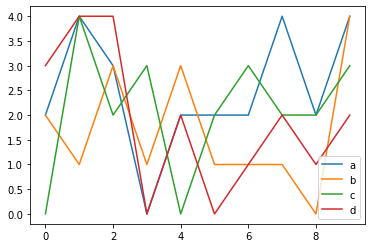

In [32]:
df.plot()

<AxesSubplot:>

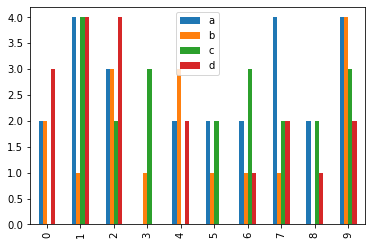

In [33]:
df.plot(kind ='bar')

<AxesSubplot:ylabel='Frequency'>

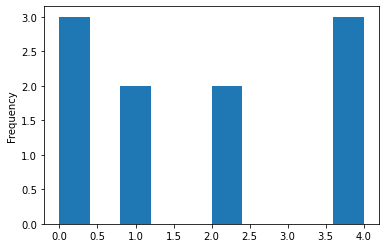

In [35]:
df['a'].plot(kind ='hist')

# 3. Data Loading

#### CSV files
- A simple CSV file can be loaded with `read_csv`
- If the file does not have a header row, pandas will assign one
- Column names can be assigned when loading data
- Can specify which column will become the index
- Can have multiple indices

In [46]:
%%writefile simple.csv
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Overwriting simple.csv


In [47]:
# simple CSV file loading


# the first row becomes the column indices
df = pd.read_csv('simple.csv')
print(df)

print(df.columns.values)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo
['a' 'b' 'c' 'd' 'message']


In [48]:
# indexing columns automatically
df = pd.read_csv('simple.csv',header=None)

print(df)

print(df.columns.values)

   0   1   2   3        4
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12      foo
[0 1 2 3 4]


In [49]:
# specifying column names
df = pd.read_csv('simple.csv',names=['c0','c1','c2','c3','c4'])

print(df)

print(df.columns.values)

  c0  c1  c2  c3       c4
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12      foo
['c0' 'c1' 'c2' 'c3' 'c4']


In [50]:
# a column can become the row index
df = pd.read_csv('simple.csv',names=['c0','c1','c2','c3','c4'],index_col='c4')
#df = pd.read_csv('simple.csv',index_col='c5')

print(df)

print(df.index.values)

        c0  c1  c2  c3
c4                    
message  a   b   c   d
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12
['message' 'hello' 'world' 'foo']


In [51]:
%%writefile simple.csv
key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
two,a,9,10
two,c,13,14

Overwriting simple.csv


In [52]:
df=pd.read_csv('simple.csv',index_col=['key1','key2'])
df

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
two  a          9      10
     c         13      14

#### TSV files
- A tab is 8 whitespace characters
- Sometimes the number of whitespace characters can vary above or below 8. Can use regular expressions


In [53]:
%%writefile simple.csv
a    b  c d        message
1   2    3 4 hello

Overwriting simple.csv


In [54]:
df = pd.read_csv("simple.csv", delimiter='\s+', header = None)
df

0  1  2  3        4
0  a  b  c  d  message
1  1  2  3  4    hello

#### JSON files

In [56]:
import json
with open('IMDB-Movie-Data.json') as json_file:
    data = json.load(json_file)

print(data)

{'Rank': {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, '10': 11, '11': 12, '12': 13, '13': 14, '14': 15, '15': 16, '16': 17, '17': 18, '18': 19, '19': 20, '20': 21, '21': 22, '22': 23, '23': 24, '24': 25, '25': 26, '26': 27, '27': 28, '28': 29, '29': 30, '30': 31, '31': 32, '32': 33, '33': 34, '34': 35, '35': 36, '36': 37, '37': 38, '38': 39, '39': 40, '40': 41, '41': 42, '42': 43, '43': 44, '44': 45, '45': 46, '46': 47, '47': 48, '48': 49, '49': 50, '50': 51, '51': 52, '52': 53, '53': 54, '54': 55, '55': 56, '56': 57, '57': 58, '58': 59, '59': 60, '60': 61, '61': 62, '62': 63, '63': 64, '64': 65, '65': 66, '66': 67, '67': 68, '68': 69, '69': 70, '70': 71, '71': 72, '72': 73, '73': 74, '74': 75, '75': 76, '76': 77, '77': 78, '78': 79, '79': 80, '80': 81, '81': 82, '82': 83, '83': 84, '84': 85, '85': 86, '86': 87, '87': 88, '88': 89, '89': 90, '90': 91, '91': 92, '92': 93, '93': 94, '94': 95, '95': 96, '96': 97, '97': 98, '98': 99, '99': 100, '100': 1

In [57]:
df = pd.read_json('IMDB-Movie-Data.json')
df

Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0                  121     8.1  757074              333.13       76.0  
1                  124     7.0  485820              126.46       65.0  
2                  117     7.3  157606              138.12       62.0  
3                  108     7.2   60545              270.32       59.0  
4                  123     6.2  393727              325.02       40.0  
..                 ...     ...     ...                 ...        ...  
995                111     6.2   27585                 NaN       45.0  
996                 94     5.5   73152               17.54       46.0  
997                 98     6.2   70699               58.01       50.0  
998                 93     5.6    4881                 NaN       22.0  
999                 87     5.3   12435               19.64       11.0  

[1000 rows x 12 columns]

## Hierarchical Index
Indices can be lists of lists, creating an hierarchy. The same is valid to columns.

In [58]:
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]
index = [['California','California','New York','New York','Texas','Texas'],
        [2000,2010,2000,2010,2000,2010]]
pop = pd.Series(populations, index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [59]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

hierarchical index in rows and columns

In [60]:
# hierarchical index in rows and columns
# hierarchical indices and columns
index = pd.MultiIndex.from_product([["California", "New York", "Texas"], [2000, 2010]],
                                   names=['state', 'year'])
columns = pd.MultiIndex.from_product([['Above 18', 'Under 18'], ['Average height', 'Median weight']],
                                     names=['age group', 'stats'])

# mock some data
data = np.round(np.random.randint(150,190, size=(6, 4)))

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

age group             Above 18                     Under 18              
stats           Average height Median weight Average height Median weight
state      year                                                          
California 2000            184           153            151           162
           2010            154           178            151           188
New York   2000            169           165            166           159
           2010            158           155            163           172
Texas      2000            161           174            168           179
           2010            156           187            160           168

In [61]:
health_data["Above 18"]

stats            Average height  Median weight
state      year                               
California 2000             184            153
           2010             154            178
New York   2000             169            165
           2010             158            155
Texas      2000             161            174
           2010             156            187

In [62]:
health_data.loc["California":"New York"]

age group             Above 18                     Under 18              
stats           Average height Median weight Average height Median weight
state      year                                                          
California 2000            184           153            151           162
           2010            154           178            151           188
New York   2000            169           165            166           159
           2010            158           155            163           172

In [63]:
health_data.loc["California", 2000]["Above 18"]

stats
Average height    184
Median weight     153
Name: (California, 2000), dtype: int64